Aqui ocorrem:
1. os testes de agrupamento com o Agrupamento Aglomerativo, para avaliação da quantidade de grupos a considerar no agrupamento definitivo;

A etapa extra de seleção de atributos não foi executada sobre o conjunto de dados utilizado aqui.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, silhouette_samples
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
pd.set_option('display.max_columns',None)
warnings.filterwarnings("ignore")

In [3]:
X = pd.read_csv('cursos-ufrpe-pos-processamento.csv',sep=';')

In [4]:
X.shape

(46, 42)

In [5]:
X.shape

(46, 42)

In [6]:
X_to_train = X.drop(['no_curso','co_curso'],axis=1)

In [7]:
min_clusters = 2
max_clusters = 20
results = []

for n_clusters in range(min_clusters, max_clusters + 1):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
    labels = agg_clustering.fit_predict(X_to_train)

    silhouette = silhouette_score(X_to_train, labels)
    calinski = calinski_harabasz_score(X_to_train, labels)
    davies = davies_bouldin_score(X_to_train, labels)

    results.append((n_clusters, silhouette, calinski, davies))

columns = ["Cluster", "Silhouette Coefficient", "Calinski-Harabasz Index", "Davies-Bouldin Index"]
df = pd.DataFrame(results, columns=columns)


In [8]:
df

,Cluster,Silhouette Coefficient,Calinski-Harabasz Index,Davies-Bouldin Index
0,2,0.264993,4.867987,0.982927
1,3,0.218433,2.762189,0.588078
2,4,0.006490,2.220746,0.743250
3,5,-0.021622,2.170583,0.730431
4,6,-0.033824,2.098115,0.727111
5,7,-0.042393,1.941480,0.749158
6,8,-0.040834,1.848490,0.756357
7,9,0.008342,2.465435,0.875925
8,10,-0.028348,2.314929,0.883541
9,11,-0.043290,2.166435,0.845155


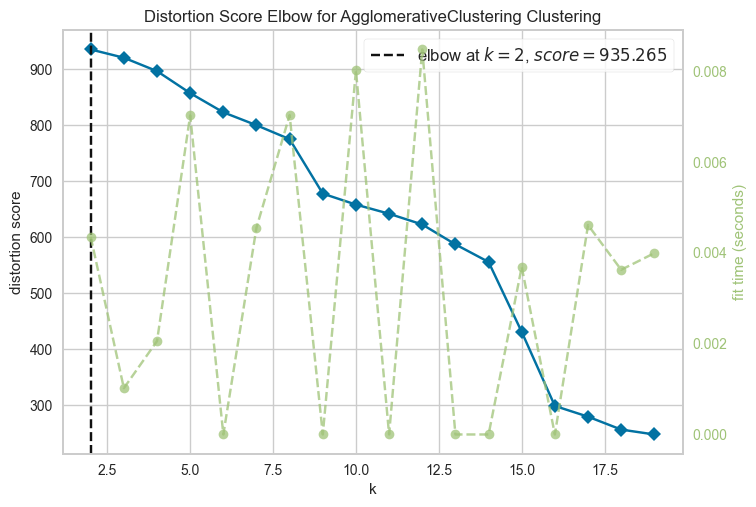

<AxesSubplot: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
visualizer = KElbowVisualizer(AgglomerativeClustering(linkage='single'), k=(2, 20))
visualizer.fit(X_to_train)
visualizer.show()

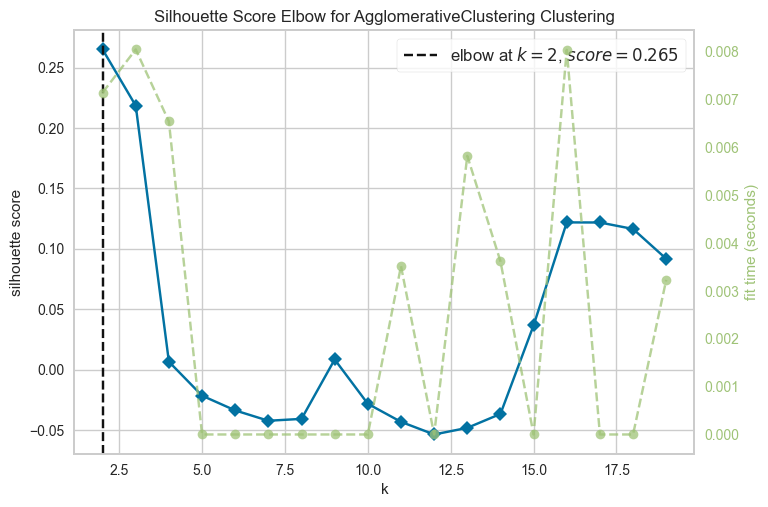

<AxesSubplot: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [10]:
visualizer = KElbowVisualizer(AgglomerativeClustering(linkage='single'), k=(2, 20),metric='silhouette')
visualizer.fit(X_to_train)
visualizer.show()

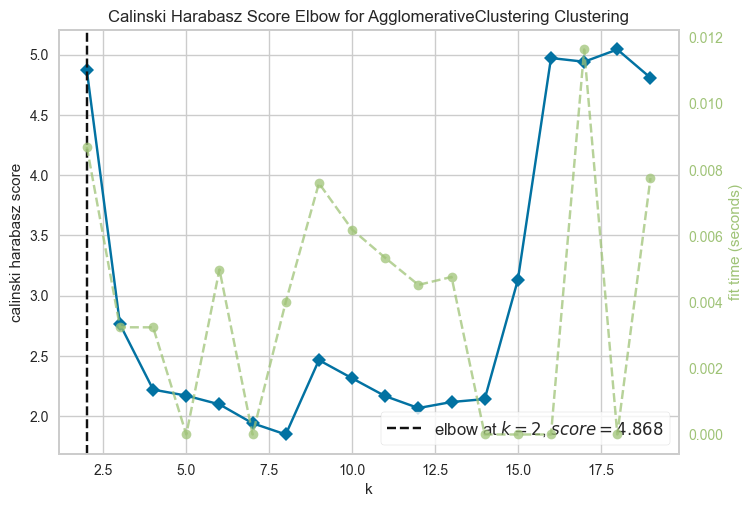

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [11]:
visualizer = KElbowVisualizer(AgglomerativeClustering(linkage='single'), k=(2, 20),metric='calinski_harabasz')
visualizer.fit(X_to_train)
visualizer.show()

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [13]:
linkage_matrix = linkage(X_to_train, method='single')

In [14]:
lista = list(X.no_curso)

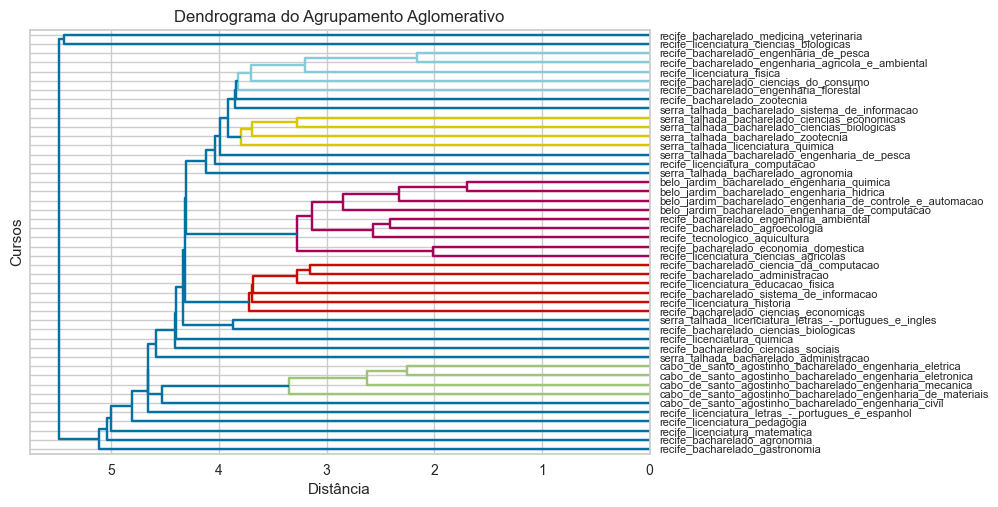

In [15]:
dendrogram(linkage_matrix, labels=lista, orientation='left')
plt.title("Dendrograma do Agrupamento Aglomerativo")
plt.ylabel("Cursos")
plt.xlabel("Distância")
plt.show()

In [16]:
agglomerative = AgglomerativeClustering(n_clusters=6, linkage='single')
agglomerative.fit(X_to_train)

AgglomerativeClustering(linkage='single', n_clusters=6)

In [17]:
X_to_train['label'] = agglomerative.labels_

In [18]:
X_to_train['no_curso'] = X['no_curso']

In [19]:
X_to_train.label.value_counts()

0    41
4     1
5     1
3     1
2     1
1     1
Name: label, dtype: int64

In [20]:
for i in range(0, 8):
    cursos_cluster_i = list(X_to_train.query('label == @i')['no_curso'])
    print('Cluster', i, '-', len(cursos_cluster_i), 'cursos')
    
    for curso in cursos_cluster_i:
        print(curso)
    
    print()


Cluster 0 - 41 cursos
belo_jardim_bacharelado_engenharia_de_computacao
belo_jardim_bacharelado_engenharia_de_controle_e_automacao
belo_jardim_bacharelado_engenharia_hidrica
belo_jardim_bacharelado_engenharia_quimica
cabo_de_santo_agostinho_bacharelado_engenharia_civil
cabo_de_santo_agostinho_bacharelado_engenharia_de_materiais
cabo_de_santo_agostinho_bacharelado_engenharia_eletronica
cabo_de_santo_agostinho_bacharelado_engenharia_eletrica
cabo_de_santo_agostinho_bacharelado_engenharia_mecanica
recife_bacharelado_administracao
recife_bacharelado_agroecologia
recife_tecnologico_aquicultura
recife_bacharelado_ciencia_da_computacao
recife_licenciatura_ciencias_agricolas
recife_bacharelado_ciencias_biologicas
recife_bacharelado_ciencias_do_consumo
recife_bacharelado_ciencias_economicas
recife_bacharelado_ciencias_sociais
recife_licenciatura_computacao
recife_bacharelado_economia_domestica
recife_licenciatura_educacao_fisica
recife_bacharelado_engenharia_agricola_e_ambiental
recife_bacharela